# Cross resonance analysis
In this notebook we call various method of CRModel() to create a coupled-qubit system and extract the hamiltonian components (ZX, ZZ, etc...)

We also simulate the time evolution of the conditional term to have a rough estimation of the gate time.

Useful references:

https://journals.aps.org/pra/pdf/10.1103/PhysRevA.101.052308 

https://github.com/zhanggy2004/QuTiPNotebooks/blob/master/CRGate/CrossResonanceGate.ipynb

In [1]:
from modeling.gates.cross_resonance import CRModel
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

### Preliminary call
We find the exchange rate J, anharmonicities through numerical diagonalization with a preliminary call.

In [2]:
system_parameters = {
    "w1" : 4.5,
    "w2": 4.4,
    "wc": 7,
    "a1": -0.3, # This is arbitrary and is ignored when mode_a is not "input"
    "a2": -0.31, # This is arbitrary and is ignored when mode_a is not "input"
    "g1": 0.09,
    "g2": 0.09,
    "C1": 90e-15,
    "C2": 90e-15,
    "use_dressed_freq": True,
    "mode_a": "numeric_dressed",
    "truncated_dim": 11
}
crmodel = CRModel(**system_parameters)
crmodel.create_report()

Frequencies:  4.496432007269483 4.396278167146029 [GHz / 2pi]
Anharmonicities:  -0.2434907356448548 -0.24430447405557665 [GHz / 2pi]
Exchange rate J:  -0.003173156934487332 [GHz / 2pi]


### Analytical sweep
We use the correct anharmonicity value and define $\omega_2$ as a list, then we compute the perturbative hamiltonian strengths.

In [3]:
delta = np.linspace(-0.7,0.7, 1000)
system_parameters = {
    "w1" : 4.5,
    "w2": 4.5- delta,
    "wc": 7,
    "a1": -0.243,
    "a2": -0.243,
    "g1": 0.09,
    "g2": 0.09,
    "C1": 90e-15,
    "C2": 90e-15,
    "use_dressed_freq": False,
    "mode_a": "input",
    "truncated_dim": 11
}
crmodel = CRModel(**system_parameters)

In [4]:
crmodel.J

array([-0.00387   , -0.00386825, -0.0038665 , -0.00386476, -0.00386301,
       -0.00386128, -0.00385954, -0.0038578 , -0.00385607, -0.00385434,
       -0.00385262, -0.00385089, -0.00384917, -0.00384746, -0.00384574,
       -0.00384403, -0.00384232, -0.00384061, -0.0038389 , -0.0038372 ,
       -0.0038355 , -0.0038338 , -0.00383211, -0.00383042, -0.00382873,
       -0.00382704, -0.00382536, -0.00382368, -0.003822  , -0.00382032,
       -0.00381865, -0.00381698, -0.00381531, -0.00381364, -0.00381198,
       -0.00381032, -0.00380866, -0.003807  , -0.00380535, -0.00380369,
       -0.00380205, -0.0038004 , -0.00379876, -0.00379711, -0.00379548,
       -0.00379384, -0.00379221, -0.00379057, -0.00378894, -0.00378732,
       -0.00378569, -0.00378407, -0.00378245, -0.00378084, -0.00377922,
       -0.00377761, -0.003776  , -0.00377439, -0.00377279, -0.00377119,
       -0.00376959, -0.00376799, -0.00376639, -0.0037648 , -0.00376321,
       -0.00376162, -0.00376003, -0.00375845, -0.00375687, -0.00

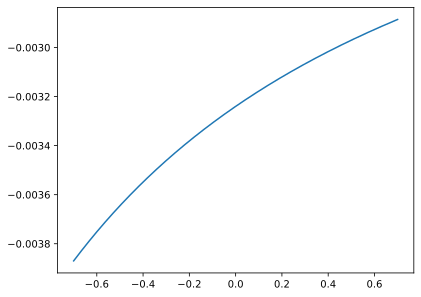

In [5]:
plt.plot(delta, crmodel.J)

(-0.001, 0.001)

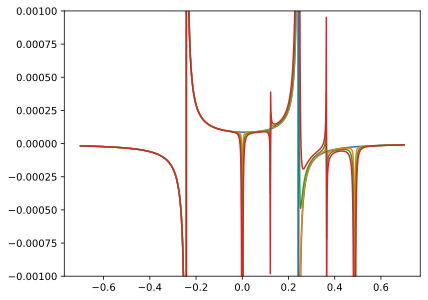

In [6]:
_, _, zz_0 = crmodel.zz_strength(0)
_, _, zz_1 = crmodel.zz_strength(0.01)
_, _, zz_2 = crmodel.zz_strength(0.02)
_, _, zz_3 = crmodel.zz_strength(0.03)
ylims = [-1e-3, 1e-3]
plt.plot(delta, zz_0)
plt.plot(delta, zz_1)
plt.plot(delta, zz_2)
plt.plot(delta, zz_3)
plt.vlines(-system_parameters['a1'], ylims[0], ylims[1])
plt.ylim(ylims)

(-0.01, 0.01)

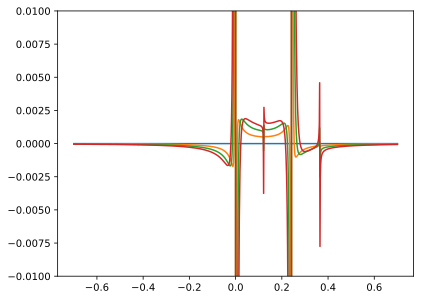

In [7]:
zx_0 = crmodel.zx_strength(0)
zx_1 = crmodel.zx_strength(0.01)
zx_2 = crmodel.zx_strength(0.02)
zx_3 = crmodel.zx_strength(0.03)
ylims = [-1e-2, 1e-2]
plt.plot(delta, zx_0)
plt.plot(delta, zx_1)
plt.plot(delta, zx_2)
plt.plot(delta, zx_3)
plt.ylim(ylims)

(-1.0, 1.0)

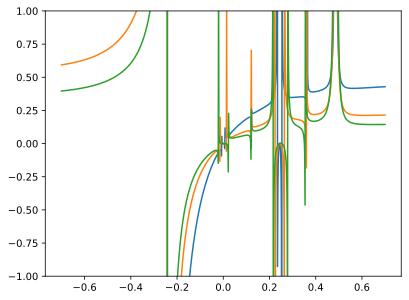

In [8]:
plt.plot(delta, zz_1 / zx_1)
plt.plot(delta, zz_2 / zx_2)
plt.plot(delta, zz_3 / zx_3)
plt.ylim([-1, 1])

### CR gate evolution
We optimize $\omega_2$, $g_1$ and $g_2$ to achieve reasonable CR gate parameters. We can also Echo away some spurious components.

(-1.0, 1.0)

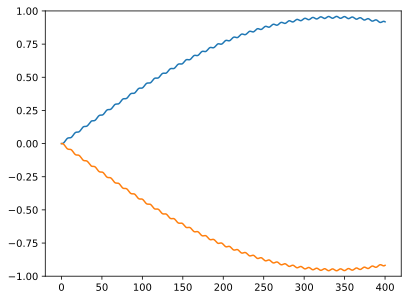

In [9]:
system_parameters = {
    "w1" : 4.5,
    "w2": 4.402456766841759,
    "wc": 7.0001590796504,
    "a1": -0.243,
    "a2": -0.243,
    "g1": 0.08, # 0.08773759814242038, with drive 0.0102100358062578057
    "g2": 0.08, #0.08773759814242038, with drive 0.0102100358062578057
    "C1": 90e-15,
    "C2": 90e-15,
    "use_dressed_freq": True,
    "mode_a": "numeric_dressed",
    "truncated_dim": 11
}

crmodel = CRModel(**system_parameters)
drive_strength = 0.015
# Initial states
# |00>
psidown = qt.tensor(qt.basis(2, 1), qt.basis(2, 1))
# |10>
psiup = qt.tensor(qt.basis(2, 0), qt.basis(2, 1))
# |+0>
psiplus = qt.tensor((qt.basis(2, 1) + qt.basis(2, 0))/np.sqrt(2),
                    qt.basis(2, 1))

tlist = np.linspace(0, 400, 501)
evolution_00 = crmodel.time_evolution(init_state=psidown, drive_strength=drive_strength, tlist=tlist, m2=0., echo=False)
evolution_10 = crmodel.time_evolution(init_state=psiup, drive_strength=drive_strength, tlist=tlist, m2=0., echo=False)

plt.plot(tlist, evolution_00[4])
plt.plot(tlist, evolution_10[4])
plt.ylim([-1, 1])

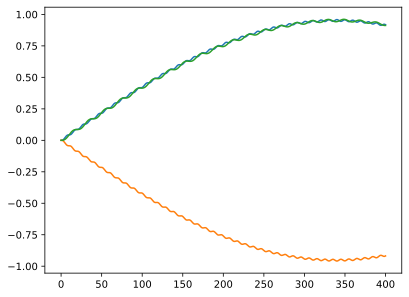

In [10]:
# Here we check that the echo mode is insensitive to the "m2" parameter
evolution_00_echo = crmodel.time_evolution(init_state=psidown, drive_strength=drive_strength, tlist=tlist, m2=0.1, echo=True, tsteps=601)
plt.plot(tlist, evolution_00[4])
plt.plot(tlist, evolution_10[4])
plt.plot(tlist, evolution_00_echo[4])

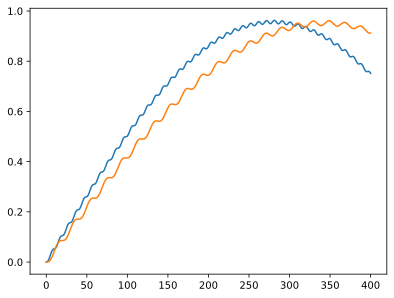

In [11]:
# Indeed, the non-echo mode picks up the spurius oscillation.
evolution_00_spurious = crmodel.time_evolution(init_state=psidown, drive_strength=drive_strength, tlist=tlist, m2=0.005, echo=False)
plt.plot(tlist, evolution_00_spurious[4])
plt.plot(tlist, evolution_00_echo[4])

In [12]:
# We can estimate the T1 Purcell of the individual qubits through the coupling cavity.
delta = 2.5*1e9
kappa_target = 1*1e6
k_purcell = kappa_target* (80*1e6/delta)**2
T1_purcell = 1/(2*np.pi*k_purcell)
print(T1_purcell * 1e6, "us")

155.42474911317905 us


### Static ZZ landscape

In [13]:
delta = np.linspace(-0.7,0.7, 101)
resonator_freq = np.linspace(6, 9, 101)
zz_numeric = np.zeros((delta.shape[0], resonator_freq.shape[0]))
Js = np.zeros(resonator_freq.shape[0])
for i, d in enumerate(delta):
    for j, wc in enumerate(resonator_freq):
        system_parameters = {
            "w1" : 4.5,
            "w2": 4.5 + d,
            "wc": wc,
            "a1": -0.243,
            "a2": -0.243,
            "g1": 0.09,
            "g2": 0.09,
            "C1": 90e-15,
            "C2": 90e-15,
            "use_dressed_freq": False,
            "mode_a": "input",
            "truncated_dim": 5,
            "crosstalk": 0.003
        }
        crmodel = CRModel(**system_parameters)
        Js[j] = crmodel.J
        zz_numeric[i, j] = crmodel.zz_strength(0)[0]

 C:\Users\moret\Desktop\work\QDAST\src\modeling\gates\cross_resonance.py: 68RuntimeWarning: divide by zero encountered in scalar divide
 C:\Users\moret\Desktop\work\QDAST\src\modeling\gates\cross_resonance.py: 70RuntimeWarning: divide by zero encountered in scalar divide
 C:\Users\moret\Desktop\work\QDAST\src\modeling\gates\cross_resonance.py: 73RuntimeWarning: invalid value encountered in scalar add
 C:\Users\moret\Desktop\work\QDAST\src\modeling\gates\cross_resonance.py: 68

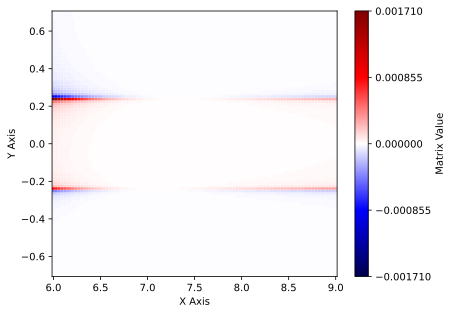

In [14]:
zz_str_masked = np.ma.masked_invalid(zz_numeric)
plt.pcolor(resonator_freq, delta, zz_str_masked, cmap='seismic', vmin=-np.abs(zz_str_masked).max(), vmax=np.abs(zz_str_masked).max())

# Label the axes
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Add colorbar with label, and make sure 0 is in the middle
cbar = plt.colorbar(label='Matrix Value')
cbar.set_ticks(np.linspace(-np.abs(zz_str_masked).max(), np.abs(zz_str_masked).max(), 5))

# Show the plot
plt.show()

(-1.0, 1.0)

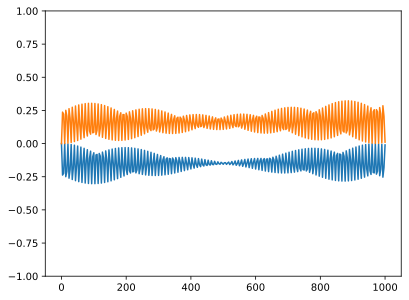

In [ ]:
system_parameters = {
    "w1" : 4.3,
    "w2": 3.97,
    "wc": 6.7,
    "a1": -0.24,
    "a2": -0.24,
    "g1": 0.09/np.sqrt(2), # 0.08773759814242038, with drive 0.0102100358062578057
    "g2": 0.09/np.sqrt(2), #0.08773759814242038, with drive 0.0102100358062578057
    "C1": 90e-15,
    "C2": 90e-15,
    "use_dressed_freq": True,
    "mode_a": "numeric_dressed",
    "truncated_dim": 11,
    "rotary_phase": 0.,
    "rotary_amp": 0.00,
    "cancel_phase": 0,
    "cancel_amp": 0
}

crmodel = CRModel(**system_parameters)
drive_strength = 0.008
# Initial states
# |00>
psidown = qt.tensor(qt.basis(2, 1), qt.basis(2, 1))
# |10>
psiup = qt.tensor(qt.basis(2, 0), qt.basis(2, 1))
# |+0>
psiplus = qt.tensor((qt.basis(2, 1) + qt.basis(2, 0))/np.sqrt(2),
                    qt.basis(2, 1))
# |-0>
psiminus = qt.tensor((qt.basis(2, 1) - qt.basis(2, 0))/np.sqrt(2),
                    qt.basis(2, 1))

tlist = np.linspace(0, 1e3, 301)
evolution_00 = crmodel.time_evolution(init_state=psidown, drive_strength=drive_strength, tlist=tlist, m2=0.01, echo=False, tsteps = 5001)
evolution_10 = crmodel.time_evolution(init_state=psiup, drive_strength=drive_strength, tlist=tlist, m2=0.01, echo=False, tsteps = 5001)

plt.plot(tlist, evolution_00[0])
plt.plot(tlist, evolution_10[0])
plt.ylim([-1, 1])

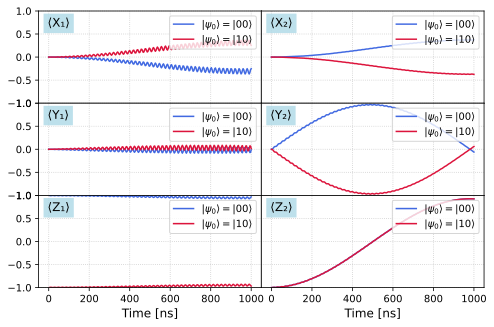

In [70]:
fig, axes = plt.subplots(
    3, 2,
    figsize=(8, 5),
    sharex=True,
    sharey='row'
)

pairs = [(0, 3), (1, 4), (2, 5)]
row_labels = ['X', 'Y', 'Z']

# Choose custom colors
color_00 = 'royalblue'
color_10 = 'crimson'

for row, (i1, i2) in enumerate(pairs):
    # --- Left column: qubit 1 ---
    ax1 = axes[row, 0]
    if i1 == 2:
        ax1.plot(tlist[1:], evolution_00[i1][1:], color=color_00, lw=1.5, label=r'$|\psi_0⟩=$|00⟩')
        ax1.plot(tlist[1:], evolution_10[i1][1:], color=color_10, lw=1.5, label=r'$|\psi_0⟩=$|10⟩')
    else:
        ax1.plot(tlist, evolution_00[i1], color=color_00, lw=1.5, label=r'$|\psi_0⟩=$|00⟩')
        ax1.plot(tlist, evolution_10[i1], color=color_10, lw=1.5, label=r'$|\psi_0⟩=$|10⟩')
    ax1.set_ylim(-1, 1)
    ax1.grid(True, ls=':', alpha=0.7)
    if row == 2:
        ax1.set_xlabel('Time [ns]', fontsize=12)
    ax1.text(
        0.04, 0.83,
        f'⟨{row_labels[row]}₁⟩',
        transform=ax1.transAxes,
        fontsize=12,
        color='black',
        bbox=dict(facecolor='lightblue', alpha=0.8, linewidth = 0)
    )
    ax1.legend(fontsize=10, loc='upper right')

    # --- Right column: qubit 2 ---
    ax2 = axes[row, 1]
    ax2.plot(tlist, evolution_00[i2], color=color_00, lw=1.5, label=r'$|\psi_0⟩=$|00⟩')
    ax2.plot(tlist, evolution_10[i2], color=color_10, lw=1.5, label=r'$|\psi_0⟩=$|10⟩')
    ax2.set_ylim(-1, 1)
    ax2.grid(True, ls=':', alpha=0.7)
    if row == 2:
        ax2.set_xlabel('Time [ns]', fontsize=12)
    ax2.text(
        0.04, 0.83,
        f'⟨{row_labels[row]}₂⟩',
        transform=ax2.transAxes,
        fontsize=12,
        color='black',
        bbox=dict(facecolor='lightblue', alpha=0.8, linewidth = 0)
    )
    ax2.legend(fontsize=10, loc='upper right')

    # Hide y-ticks on the right column
    ax2.tick_params(axis='y', left=False, labelleft=False)

# Tighten layout and remove all gaps
plt.subplots_adjust(hspace=0.0, wspace=0.0)
plt.savefig("cr_pauli_ev_echo_no_cross.svg", bbox_inches = "tight")
plt.show()

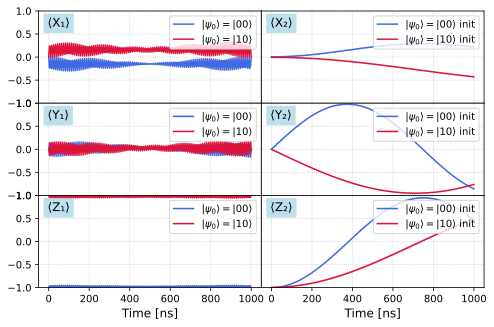

In [ ]:
fig, axes = plt.subplots(
    3, 2,
    figsize=(8, 5),
    sharex=True,
    sharey='row'
)

pairs = [(0, 3), (1, 4), (2, 5)]
row_labels = ['X', 'Y', 'Z']

# Choose custom colors
color_00 = 'royalblue'
color_10 = 'crimson'

for row, (i1, i2) in enumerate(pairs):
    # --- Left column: qubit 1 ---
    ax1 = axes[row, 0]
    ax1.plot(tlist, evolution_00[i1], color=color_00, lw=1.5, label=r'$|\psi_0⟩=$|00⟩')
    ax1.plot(tlist, evolution_10[i1], color=color_10, lw=1.5, label=r'$|\psi_0⟩=$|10⟩')
    ax1.set_ylim(-1, 1)
    ax1.grid(True, ls=':', alpha=0.7)
    if row == 2:
        ax1.set_xlabel('Time [ns]', fontsize=12)
    ax1.text(
        0.04, 0.83,
        f'⟨{row_labels[row]}₁⟩',
        transform=ax1.transAxes,
        fontsize=12,
        color='black',
        bbox=dict(facecolor='lightblue', alpha=0.8, linewidth = 0)
    )
    ax1.legend(fontsize=10, loc='upper right')

    # --- Right column: qubit 2 ---
    ax2 = axes[row, 1]
    ax2.plot(tlist, evolution_00[i2], color=color_00, lw=1.5, label=r'$|\psi_0⟩=$|00⟩')
    ax2.plot(tlist, evolution_10[i2], color=color_10, lw=1.5, label=r'$|\psi_0⟩=$|10⟩')
    ax2.set_ylim(-1, 1)
    ax2.grid(True, ls=':', alpha=0.7)
    if row == 2:
        ax2.set_xlabel('Time [ns]', fontsize=12)
    ax2.text(
        0.04, 0.83,
        f'⟨{row_labels[row]}₂⟩',
        transform=ax2.transAxes,
        fontsize=12,
        color='black',
        bbox=dict(facecolor='lightblue', alpha=0.8, linewidth = 0)
    )
    ax2.legend(fontsize=10, loc='upper right')

    # Hide y-ticks on the right column
    ax2.tick_params(axis='y', left=False, labelleft=False)

# Tighten layout and remove all gaps
plt.subplots_adjust(hspace=0.0, wspace=0.0)
plt.savefig("cr_pauli_ev.svg", bbox_inches = "tight")
plt.show()


In [17]:
## Parameter optimization routine (doesn't work so well).

# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.optimize import minimize

# # Define the system parameters as a dictionary with initial guesses
# system_parameters = {
#     "w1": 4.5,
#     "w2": 4.43,  # Fixed
#     "wc": 7,
#     "a1": -0.243,  # Fixed
#     "a2": -0.243,  # Fixed
#     "g1": 0.075,
#     "g2": 0.075,  # g2 is equal to g1, so keep it linked
#     "C1": 90e-15,  # Fixed
#     "C2": 90e-15,  # Fixed
#     "use_dressed_freq": True,
#     "mode_a": "numeric_dressed",
#     "truncated_dim": 2
# }

# # Assume crmodel and the relevant functions are defined and imported correctly
# # You will need to define or import CRModel

# # Initial states (Qutip basis states)
# psidown = qt.tensor(qt.basis(2, 1), qt.basis(2, 1))  # |00>
# psiup = qt.tensor(qt.basis(2, 0), qt.basis(2, 1))    # |10>
# psiplus = qt.tensor((qt.basis(2, 1) + qt.basis(2, 0))/np.sqrt(2), qt.basis(2, 1))  # |+0>

# # Time list for evolution
# tlist = np.linspace(0, 250, 1001)

# # Define the objective function that we want to minimize
# def objective(params):
#     # Unpack the parameters we are optimizing
#     w2, g1, wc, drive_strength = params
    
#     # Update system parameters
#     system_parameters["w2"] = w2
#     system_parameters["g1"] = g1
#     system_parameters["g2"] = g1  # g2 is equal to g1
#     system_parameters["wc"] = wc

#     # Recreate the model with updated parameters
#     crmodel = CRModel(**system_parameters)

#     # Calculate the time evolution for the |00> initial state
#     evolution_00 = crmodel.time_evolution(init_state=psidown, drive_strength=drive_strength, tlist=tlist, m2=0., echo=False)
    
#     # Calculate the value to minimize: we want np.max(np.abs(evolution_00[4])) to be as close as possible to 1
#     target_value = np.max(np.abs(evolution_00[4]))
    
#     # Return the squared difference between the target value and 1
#     return abs(target_value - 1)

# # Initial guesses for parameters: [w1, g1, wc, drive_strength]
# initial_guesses = [4.4, 0.055, 7.0, 0.018]

# # Bounds for the parameters to be optimized: (min, max) for each parameter
# bounds = [(4.1, 4.49),  # w1 bounds
#           (0.04, 0.09),  # g1 bounds (which also applies to g2)
#           (6.0, 8.0),  # wc bounds
#           (0.005, 0.08)]  # drive_strength bounds

# # Use the 'minimize' function from scipy to perform the optimization
# result = minimize(objective, initial_guesses, bounds=bounds, method='L-BFGS-B')

# # Output the optimized parameters
# optimized_w1, optimized_g1, optimized_wc, optimized_drive_strength = result.x
# print(f"Optimized w1: {optimized_w1}")
# print(f"Optimized g1: {optimized_g1}")
# print(f"Optimized wc: {optimized_wc}")
# print(f"Optimized drive_strength: {optimized_drive_strength}")
# result